In [1]:
import pandas as pd
import pickle
import os
import datetime
import pybamm
import matplotlib.pyplot as plt
from scipy import integrate
import math
import numpy as np
%matplotlib widget

fig_DIR = "../figures/figures_rpt/"
data_DIR = "../data/ocp/"

In [2]:
dfo = pd.read_csv(data_DIR+"full_cell_ocv"+".csv")

In [3]:
model = pybamm.lithium_ion.SPMe() 
param=model.param

In [4]:
parameter_values = pybamm.ParameterValues(chemistry=pybamm.parameter_sets.Siegel2022)

In [5]:
# parameter_values.search("initial concentration")

In [6]:

# Experiment
experiment = pybamm.Experiment(
    [
         "Charge at "+"C/20"+" until 4.2V", 
         "Hold at 4.2V until C/50"
    ],
    # ] *40,
    termination="50% capacity",
#     cccv_handling="ode",
)

sim = pybamm.Simulation(model, parameter_values=parameter_values,experiment=experiment, solver=pybamm.CasadiSolver(mode="safe"))
sim.solve(initial_soc=0.0001)
solution = sim.solution

In [7]:
t = solution["Time [s]"].entries
V = solution["Terminal voltage [V]"].entries
I = solution["Current [A]"].entries
Q = -solution['Discharge capacity [A.h]'].entries

In [8]:
C_n_init = 4.04
C_p_init = 4.12
eps_n_data = parameter_values.evaluate(C_n_init*3600/(param.n.L * param.n.prim.c_max * param.F* param.A_cc))
eps_p_data = parameter_values.evaluate(C_p_init*3600/(param.p.L * param.p.prim.c_max * param.F* param.A_cc))
cs_n_init =  parameter_values.evaluate(param.n.prim.c_max*0.02)
cs_p_init =  parameter_values.evaluate(param.p.prim.c_max*0.94)

In [9]:
parameter_values = pybamm.ParameterValues(chemistry=pybamm.parameter_sets.Siegel2022)

In [10]:
parameter_values.update(
    {
        "Negative electrode active material volume fraction": eps_n_data,
        "Positive electrode active material volume fraction": eps_p_data,
        "Initial concentration in negative electrode [mol.m-3]":cs_n_init,
        "Initial concentration in positive electrode [mol.m-3]":cs_p_init,
    },
    check_already_exists=False,
)

In [11]:
# Experiment
experiment = pybamm.Experiment(
    [
         "Charge at "+"C/50"+" until 4.2V", 
         "Hold at 4.2V until C/50"
    ],
    # ] *40,
    termination="50% capacity",
#     cccv_handling="ode",
)

sim = pybamm.Simulation(model, parameter_values=parameter_values,experiment=experiment, solver=pybamm.CasadiSolver(mode="safe"))
sim.solve()
solution1 = sim.solution

In [12]:
t1 = solution1["Time [s]"].entries
V1 = solution1["Terminal voltage [V]"].entries
I1 = solution1["Current [A]"].entries
Q1 = -solution1['Discharge capacity [A.h]'].entries

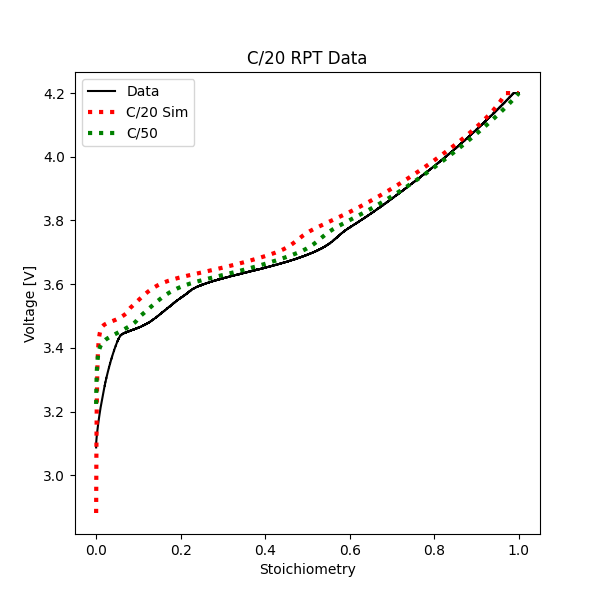

In [16]:
fig,ax = plt.subplots(figsize=(6, 6))
ax.plot(dfo['z_f'],dfo['V_f'],'k')
ax.plot(Q/max(Q),V,'r:',linewidth=3)
ax.plot(Q1/max(Q1),V1,'g:',linewidth=3)
ax.set_ylabel('Voltage [V]')
ax.set_xlabel('Stoichiometry')
ax.legend(['Data','C/20 Sim','C/50'])
ax.set_title('C/20 RPT Data')
fig.savefig(fig_DIR+'OCV_sim'+'.png')

In [14]:
fgdfdfg

NameError: name 'fgdfdfg' is not defined

In [ ]:
def Un(sto):
    u_eq = (
        0.115
        + 0.8000 *math.exp(-75 * (sto - 0.0013))
        - 0.0040 *math.tanh((sto - 0.1503) / 0.0046)
        - 0.0450 *math.tanh((sto - 0.1804) / 0.0500)
        - 0.0160 *math.tanh((sto - 0.5291) / 0.0250)
        - 0.0500 *math.tanh((sto - 1) / 0.0458)
    )

    return u_eq

def Up(sto):
    u_eq = (
        4.396
        - 1.538 * sto
        + 0.7194 * (sto ** 2)
        - 0.009979 * (sto ** 3)
        + 1.074 * (sto ** 4)
        - 1.075 * (sto ** 5)
        - 4.071 * math.exp(75 * sto - 80.9)
    )

    return u_eq

In [ ]:
Up(0.07)-Un(0.91)

In [ ]:
3.627-0.4

In [ ]:
x =np.linspace(-0.01,1,1000)
Upx = list(map(Up,x))
Unx = list(map(Un,x))


In [ ]:
fig,ax = plt.subplots(figsize=(6, 6))
ax.plot(x,Unx)

In [ ]:
fig,ax = plt.subplots(figsize=(6, 6))
ax.plot(x,Upx)